In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
##loading the data set
stars = pd.read_csv("/content/6 class csv.csv")
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
##checking of missing values
stars.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

Creating our own Hertzsprung Russell Diagram

In [ ]:
stars["Spectral Class"].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [ ]:
stars["Star color"].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [ ]:
stars['Star type'].value_counts() , stars['Spectral Class'].value_counts()

(5    40
 4    40
 3    40
 2    40
 1    40
 0    40
 Name: Star type, dtype: int64, M    111
 B     46
 O     40
 A     19
 F     17
 K      6
 G      1
 Name: Spectral Class, dtype: int64)

Text(0, 0.5, 'count')

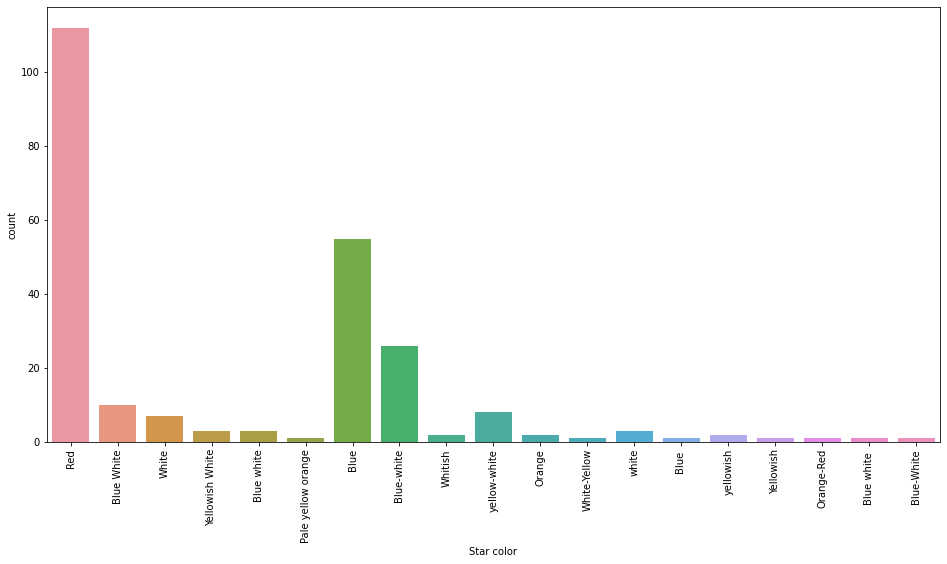

In [ ]:
fig,ax=plt.subplots(figsize=(16,8))
sns.countplot(stars['Star color'],ax=ax)
plt.setp(ax.get_xticklabels(),rotation =90)
plt.ylabel('count')

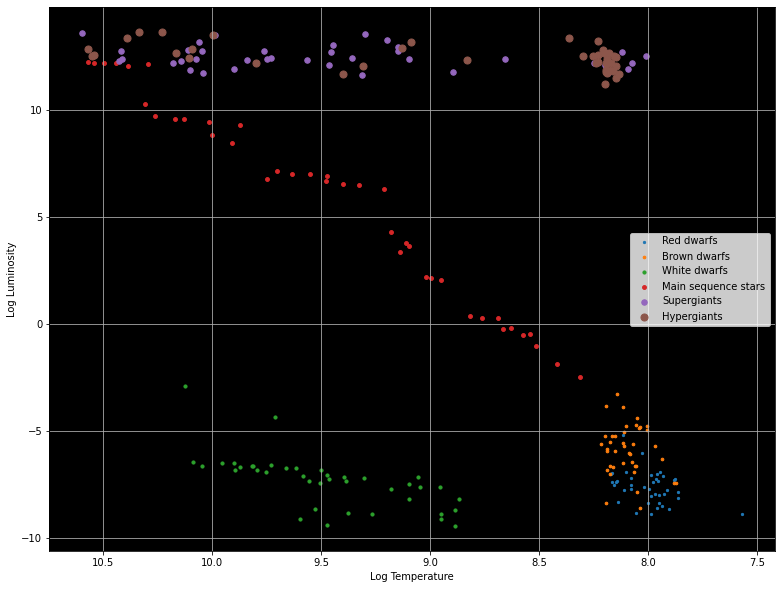

In [ ]:
fig , ax = plt.subplots(figsize = (13,10))

R = stars[stars["Star type"] == 0]
B = stars[stars["Star type"] == 1]
W = stars[stars["Star type"] == 2]
M = stars[stars["Star type"] == 3]
S = stars[stars["Star type"] == 4]
H = stars[stars["Star type"] == 5]

ax.scatter(np.log(R["Temperature (K)"]), np.log(R["Luminosity(L/Lo)"]),5, label = 'Red dwarfs')
ax.scatter(np.log(B["Temperature (K)"]), np.log(B["Luminosity(L/Lo)"]),7, label = 'Brown dwarfs')
ax.scatter(np.log(W["Temperature (K)"]), np.log(W["Luminosity(L/Lo)"]),10, label = 'White dwarfs')
ax.scatter(np.log(M["Temperature (K)"]), np.log(M["Luminosity(L/Lo)"]),15, label = 'Main sequence stars')
ax.scatter(np.log(S["Temperature (K)"]), np.log(S["Luminosity(L/Lo)"]),30, label = 'Supergiants')
ax.scatter(np.log(H["Temperature (K)"]), np.log(H["Luminosity(L/Lo)"]),50, label = 'Hypergiants')

ax.invert_xaxis()
ax.legend()
plt.xlabel("Log Temperature")
plt.ylabel("Log Luminosity")
ax.grid()
ax.set_facecolor("black")

This is a dataset consisting of several features of stars.

Some of them are:

Absolute Temperature (in K)
Relative Luminosity (L/Lo)
Relative Radius (R/Ro)
Absolute Magnitude (Mv)
Star Color (white,Red,Blue,Yellow,yellow-orange etc)
Spectral Class (O,B,A,F,G,K,,M)
Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)

Brown Dwarf -> Star Type = 0   
Red Dwarf -> Star Type = 1  
White Dwarf-> Star Type = 2  
Main Sequence -> Star Type = 3  
Supergiant -> Star Type = 4  
Hypergiant -> Star Type = 5   

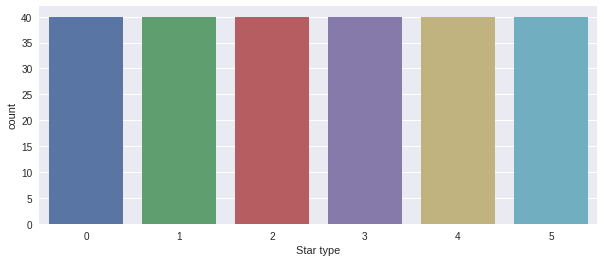

In [ ]:
#visualizing the data .
plt.style.use('seaborn')

#lets see hte count of stars from each type 
fig,ax=plt.subplots(figsize=(10,4))
sns.countplot(stars['Star type'],ax=ax)

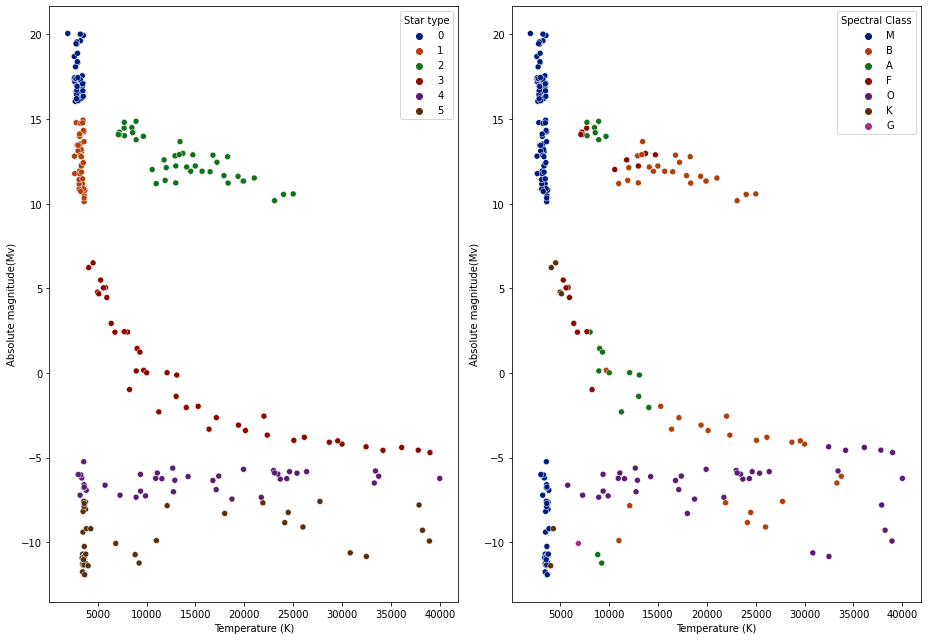

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=stars,hue='Star type',ax=ax[0],palette='dark')
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=stars,hue='Spectral Class',ax=ax[1],palette='dark')
plt.tight_layout()
plt.show()

In [ ]:
#numeric features description
stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
fig = px.bar(stars, y = 'Spectral Class',color="Star type", template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.histogram(stars, y="Spectral Class", x="Star type", color="Temperature (K)",
                   hover_data=stars.columns, template = 'plotly_dark', title = 'Spectral Class and Star Type with their temperatures')
fig.show()

In [ ]:
fig = px.pie(stars, names='Spectral Class', values='Temperature (K)', template = 'plotly_dark', 
             title = 'Representation of Spectral Classes with their Temperature')
fig.show()